In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json


In [2]:
passangers_data = "resources/passangers_first.csv"
planes_data="resources/Airtransport.new.csv"
total_passangers_data = "resources/totalpassangers.csv"
plane_total_date="resources/plane.total.csv"
total_passangers_data_df = pd.read_csv(total_passangers_data)
url="https://api.worldbank.org/v2/country/ZAF/indicator/ST.INT.ARVL?format=json"
url_uk="https://api.worldbank.org/v2/country/GBR/indicator/IS.AIR.PSGR?format=json"

In [3]:
passangers_data_df = pd.read_csv(passangers_data)
passangers_data_df.head(6)

,Airports,2007,2008,2009,2010,2011,2012,2013,2014
0,GATWICK,35216239,34205887,32392520,31375290,33674264,34235982,35444206,38103667
1,HEATHROW,68066028,67054745,66036957,65881660,69433230,70037417,72367054,73405330
2,LONDON CITY,2912123,3260236,2796890,2780582,2992847,3016664,3379753,3647824
3,LUTON,9927321,10180734,9120546,8738712,9513704,9617697,9697944,10484938
4,SOUTHEND,49311,44075,3948,3583,42439,617027,969912,1102358
5,STANSTED,23779697,22360364,19957077,18573592,18052843,17472699,17852393,19965093


In [4]:
total_passangers_yearly=passangers_data_df[["2007","2008","2009","2010","2011","2012","2013","2014"]].sum()
total_passangers_yearly

2007    139950719
2008    137106041
2009    130307938
2010    127353419
2011    133709327
2012    134997486
2013    139711262
2014    146709210
dtype: int64

In [5]:

df=total_passangers_data_df

df=df.loc[df["year"]>2007,:]
df
yuk=df["total"]

Text(0.5, 1.0, 'Total Arrivals In London Airports')

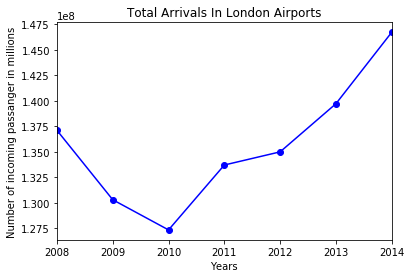

In [6]:
#total arrival for London

df.plot('year','total', marker ='o', color='blue',legend= False)
plt.xlabel("Years")
plt.ylabel("Number of incoming passanger in millions")
plt.title("Total Arrivals In London Airports")





In [7]:
planes_data_df = pd.read_csv(planes_data)
total_passangers_yearly=passangers_data_df[["2007","2008","2009","2010","2011","2012","2013","2014"]].sum()
total_passangers_yearly


2007    139950719
2008    137106041
2009    130307938
2010    127353419
2011    133709327
2012    134997486
2013    139711262
2014    146709210
dtype: int64

In [8]:
plane_total_date_df = pd.read_csv(plane_total_date)
plane_total_date_df.head(10)

,Year,Total
0,2007,139951
1,2008,137106
2,2009,130308
3,2010,127353
4,2011,133709
5,2012,134997
6,2013,139711
7,2014,146709


Text(0.5, 1.0, 'Total Planes Arriving In London Airports')

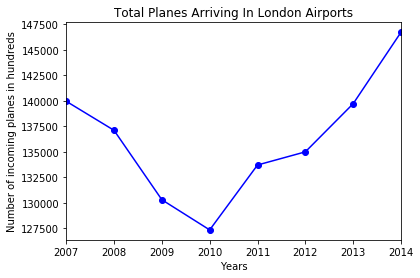

In [9]:

plane_total_date_df.plot('Year','Total',marker ='o', color='blue',legend= False)
plt.xlabel("Years")
plt.ylabel("Number of incoming planes in hundreds")
plt.title("Total Planes Arriving In London Airports")


In [10]:
#south africa
baseUrl='https://api.worldbank.org/v2/country/ZAF/indicator/IS.AIR.PSGR?format=json'
data=requests.get(baseUrl).json()
#print(json.dumps(data,indent=4))
data[1][5]['date']

'2014'

In [11]:
year=[]
PassengerValue=[]
counter=5
for x in range(9):
    year.append(data[1][counter]['date'])
    PassengerValue.append(data[1][counter]['value'])
    counter+=1
dfi=pd.DataFrame({
    'Year':year,
    'Value': PassengerValue
})
dfi=dfi.sort_values(by=['Year'])
dfi

,Year,Value
8,2006,1.293267e+07
7,2007,1.287032e+07
6,2008,1.313544e+07
5,2009,1.250363e+07
4,2010,1.578121e+07
3,2011,1.640778e+07
2,2012,1.757157e+07
1,2013,1.631125e+07
0,2014,1.702664e+07


In [12]:
dfi["Value"] = dfi["Value"]
dfi=dfi.drop([0,8])
dfi

,Year,Value
7,2007,1.287032e+07
6,2008,1.313544e+07
5,2009,1.250363e+07
4,2010,1.578121e+07
3,2011,1.640778e+07
2,2012,1.757157e+07
1,2013,1.631125e+07


Text(0, 0.5, 'Passengers in Millions')

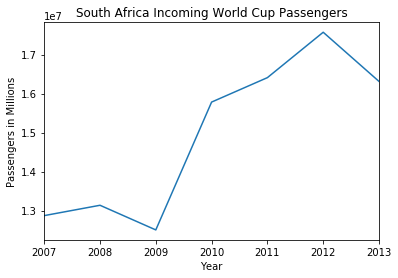

In [13]:
passengers = dfi.plot('Year','Value',title = "South Africa Incoming World Cup Passengers",legend= False)
passengers.set_ylabel("Passengers in Millions")

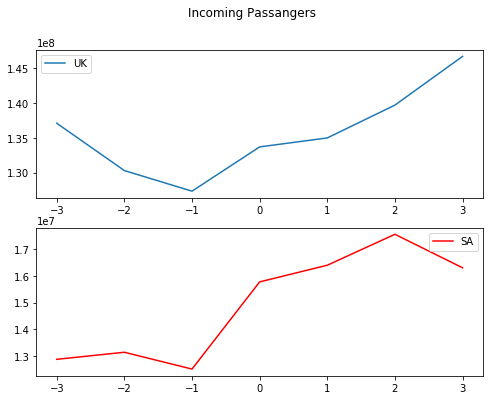

In [18]:
time=[-3,-2,-1,0,1,2,3]
fig, axs = plt.subplots(2,figsize=(8,6))
fig.suptitle("Incoming Passangers")
axs[0].plot(time,yuk,label='UK')
axs[0].legend()
axs[1].plot(time,ysa,'r-',label='SA')
axs[1].legend()
#ysa=(dfi["Value"])

#UK ,= plt.plot(time,yuk, marker ='o', color='blue', label="UK")
#SA ,= plt.plot(time,ysa,marker= 'o',color='red', label="South Africa")